In [ ]:
%load_ext rpy2.ipython
#to run R in Python

In [ ]:
%%R
options (scipen=999)
#very small numbers are displayed in standard decimal

In [ ]:
#load common packages
%%R
install.packages ("dplyr")
library(dplyr)
install.packages ("ggplot2")
library(ggplot2)
install.packages ("caTools")
library(caTools)
#install.packages ("corrgram")
#library(corrgram)
install.packages ("GGally")
library (GGally)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpQzFOb6/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpQzFOb6/downloaded_packages’

(as ‘lib’ is unspecified)














	‘/tmp/RtmpQzFOb6/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpQzFOb6/downloaded_packages’



In [ ]:
%%R
library (datasets)
data(iris)
summary (iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                


Before fitting the model, we should explore the variables, and we can fit plot to find any pattern in the data

In [ ]:
#check for missing values
%%R
any(is.na(iris))

[1] FALSE


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


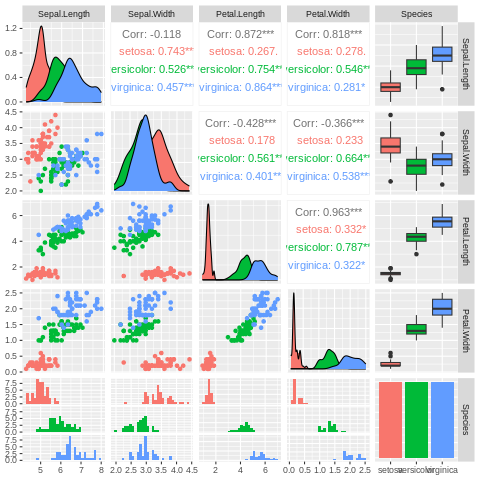

In [ ]:
# Create a pair plot
%%R
ggpairs(iris, aes(color = Species))

In [ ]:
#Let’s set a random seed. Train/test split is a random process,
#Ensure that randomization works the same on yours and my computer
%%R
set.seed(42)

In [ ]:
#Let’s split data now.
#>70% of the data is used for training,
#>and the remaining 30% is used for testing. Here’s the code:
%%R
sampleSplit <- sample.split (Y=iris$Sepal.Length, SplitRatio=0.7)
trainSet <- subset (x=iris, sampleSplit==TRUE)
testSet <- subset (x=iris, sampleSplit==FALSE)

In [ ]:
%%R
names (trainSet)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"     


In [ ]:
%%R
names (testSet)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"     


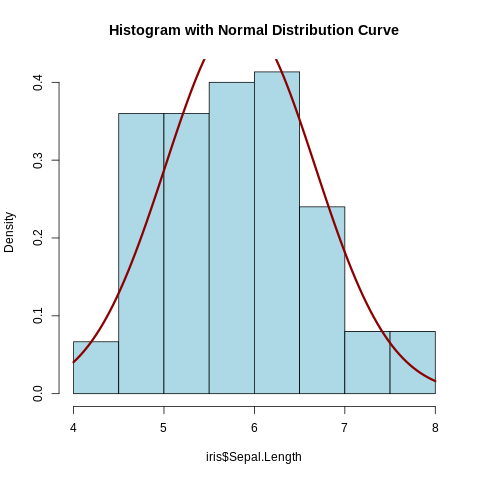

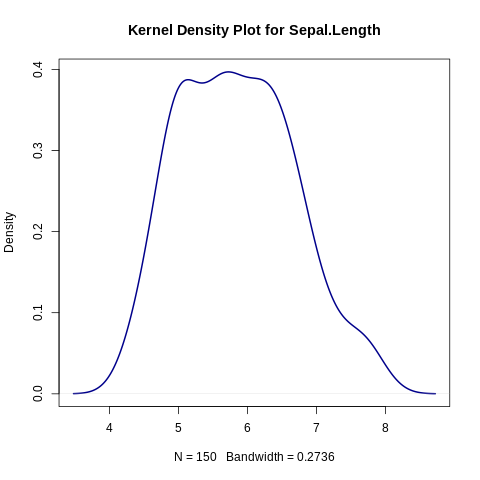

In [ ]:
%%R
#We can build a model with training datasets
#We are considering the Sepal.Length as the outcome variable of interest
# Create a histogram with a normal distribution curve
hist(iris$Sepal.Length, probability = TRUE, col = "lightblue", main = "Histogram with Normal Distribution Curve")

# Add a normal distribution curve
curve(dnorm(x, mean = mean(iris$Sepal.Length), sd = sd(iris$Sepal.Length)), col = "darkred", lwd = 3, add = TRUE)

# Create a kernel density plot for Sepal.Length
plot(density(iris$Sepal.Length), main = "Kernel Density Plot for Sepal.Length", col = "darkblue", lwd = 2)

The outcome variable looks normally distributed, which meet the assumptions of the linear regression

In [ ]:
#Bulding a model
%%R
model <- lm (formula=Sepal.Length ~ Petal.Length+Petal.Width+Sepal.Width, data=trainSet)
#This only works if we decide to use all predictors for model training.

In [ ]:
#Next, we can take a look at the summary of our model.
%%R
summary(model)


Call:
lm(formula = Sepal.Length ~ Petal.Length + Petal.Width + Sepal.Width, 
    data = trainSet)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85204 -0.22482 -0.00644  0.19959  0.80673 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept)   1.82729    0.29327   6.231     0.00000001002677 ***
Petal.Length  0.70411    0.06618  10.639 < 0.0000000000000002 ***
Petal.Width  -0.52536    0.15321  -3.429              0.00087 ***
Sepal.Width   0.65974    0.07886   8.366     0.00000000000029 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3226 on 104 degrees of freedom
Multiple R-squared:  0.8612,	Adjusted R-squared:  0.8572 
F-statistic:   215 on 3 and 104 DF,  p-value: < 0.00000000000000022



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


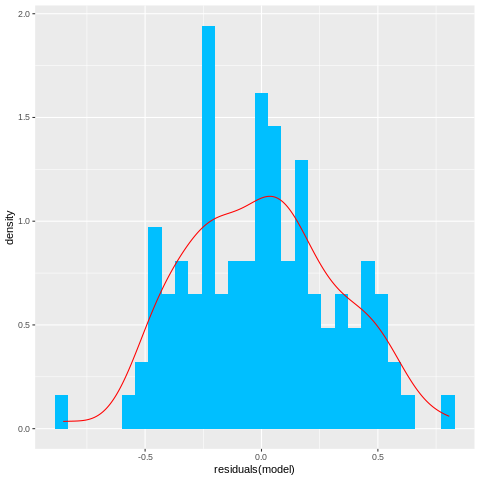

In [ ]:
#Next, we can make histogram of residuals to be more precise.
#Here we expect to see something approximately normally distributed.
%%R
modelResiduals <- as.data.frame(residuals(model))
ggplot(modelResiduals, aes(residuals(model))) +
geom_histogram(aes(y = ..density..), fill="deepskyblue")+
  geom_density(color = "red")

We can see that the residuals look approximately normally distributed

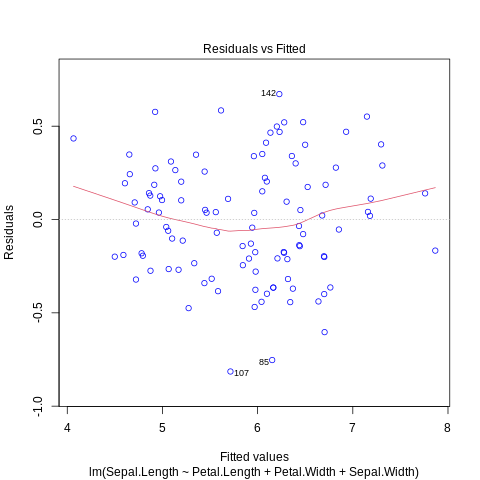

In [ ]:
# Residuals vs. Fitted Values Plot
%%R
plot(model, which = 1, col = "blue")

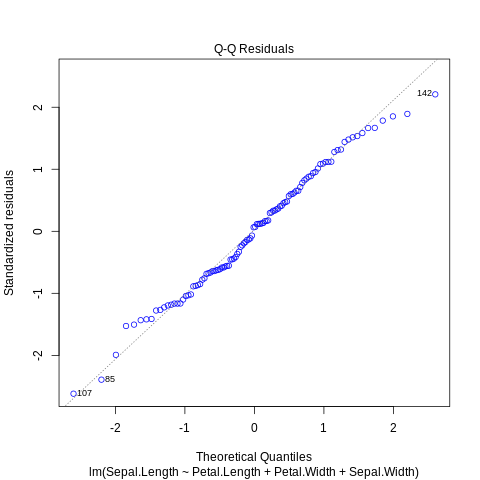

In [ ]:
%%R
# Normal Q-Q Plot
plot(model, which = 2, col = "blue")

In [ ]:
#And now we can finally make predictions.
%%R
prediction <- predict(model, testSet)
#We are going to predict earch individual obervations by using the model

In [ ]:
#And now we can evaluate.
#We’ll create a data frame of actual and predicted values.
%%R
modelEval <- cbind(testSet$Sepal.Length, prediction)
colnames(modelEval) <- c("Actual", "Predicted")
modelEval <- as.data.frame(modelEval)
modelEval

    Actual Predicted
1      5.1  4.993073
6      5.4  5.368482
8      5.0  4.995685
15     5.8  5.189420
16     5.7  5.564829
18     5.1  4.941695
22     5.1  5.094498
26     5.0  4.796727
28     5.2  5.062875
30     4.7  4.931107
31     4.8  4.863917
32     5.4  4.892928
35     4.9  4.794115
38     4.9  5.111642
39     4.4  4.587321
44     5.0  4.927162
48     4.6  4.791503
52     6.4  6.287437
54     5.5  5.436474
56     5.7  6.121434
59     6.6  6.258426
63     6.0  5.523420
64     6.1  6.276849
67     5.6  6.153057
70     5.6  5.603810
72     6.1  5.772425
79     6.0  6.085867
81     5.5  5.466818
83     5.8  5.686812
88     6.3  5.715682
101    6.3  6.887867
109    6.7  6.570394
113    6.8  6.542803
125    6.7  6.883977
127    6.2  6.073946
130    7.2  7.009102
133    6.4  6.426846
136    7.7  6.858857
137    6.3  6.727229
140    6.9  6.540191
148    6.5  6.384776
150    5.9  6.417732


We can see our model is very close enough to predict the observed value in the new data set (test). Now the question is how close.  

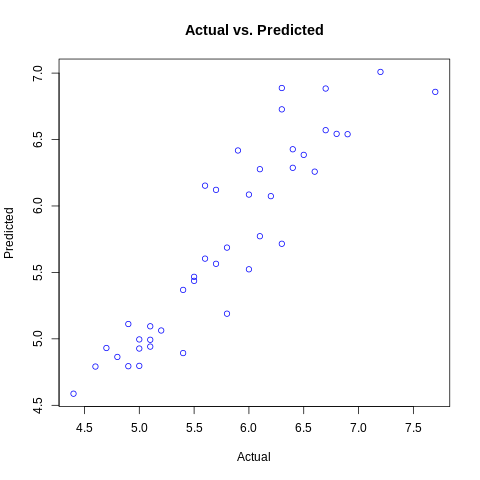

In [ ]:
#Actual vs. Predicted
%%R
plot(modelEval$Actual, modelEval$Predicted,
     xlab = "Actual", ylab = "Predicted",
     main = "Actual vs. Predicted", col = "blue")

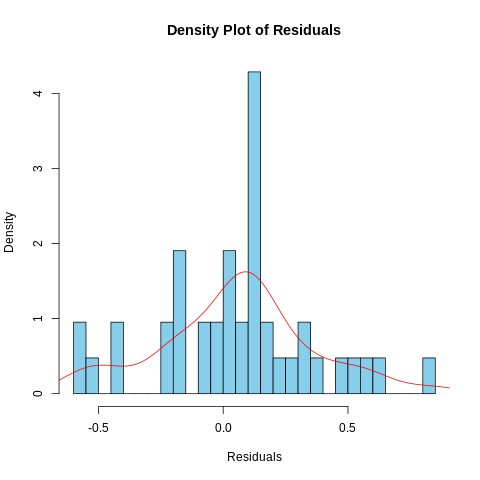

In [ ]:
##Density Plot of Residuals
%%R
residuals <- modelEval$Actual - modelEval$Predicted
hist(residuals, freq = FALSE, breaks = 50,
     main = "Density Plot of Residuals",
     xlab = "Residuals",
     col = "skyblue")
lines(density(residuals), col = "red")



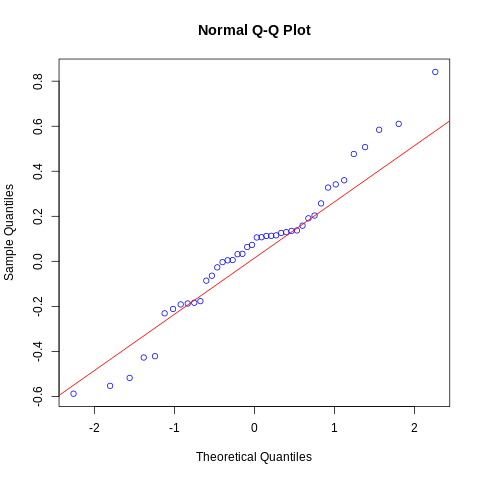

In [ ]:
#QQ Plot
%%R
qqnorm(residuals, col = "blue") #graphical tool for comparing the distribution of a dataset to a theoretical normal distribution
qqline(residuals, col = "red")


In [ ]:
# MSE (Mean Squared Error) and RMSE (Root Mean Squared Error ) will tell us the performance of the model
%%R
mse <- mean((modelEval$Actual-modelEval$Predicted)^2)
rmse <- sqrt(mse)
rmse

[1] 0.3123639


We got the RMSE value of 0.31, This means that we’re on average wrong by 0.31 units of Sepal.Length.

In [ ]:
#correlation between the actual and predicted values can be used as a form of accuracy measure.
%%R
correlation_accuracy <- cor(modelEval)
correlation_accuracy

             Actual Predicted
Actual    1.0000000 0.9142128
Predicted 0.9142128 1.0000000


Higher correlation coefficient indicates better alignment between the predicted and actual values, suggesting that the model is performing well.

In [ ]:
#Min-Max Accuracy Calculation
#mean of the ratios of the minimum to the maximum value
%%R
min_max_accuracy <- mean(apply(modelEval, 1, min) / apply(modelEval, 1, max))
min_max_accuracy

[1] 0.9608177


A value of 1 indicates perfect accuracy, meaning that for each observation, the predicted value is exactly equal to the actual value.

Values less than 1 indicate that the predicted value is lower than the actual value.

The closer the value is to 1, the higher the accuracy.
Values greater than 1 indicate that the predicted value is higher than the actual value.

In [ ]:
# MAPE (Mean Absolute Percentage Error) Calculation
%%R
mape <- mean(abs((modelEval$Predicted - modelEval$Actual))/modelEval$Actual)
mape

[1] 0.04020034


MAPE is 4%, this indicates the average percentage error of the model's predictions relative to the actual values is 4%.

##This seems like a good model